El autoencoder es una red neuronal de dos partes, una que va desde el espacio del input X a un espacio Y y la otra que se devuelve, o sea, que va desde Y a X, esto con el objetivo de extraer la informacion mas importante del input y codificarla en el espacio Y, que generalmente tiene mejores propiedades (dimension, estructura, representacion, etc...).
Se pide entrenar un autoencoder para tres objetivos distintos: Reduccion de dimensionalidad, denoising y pre-entrenamiento.

Primero se debe separar la base de datos MNIST de digitos manuscritos, en conjutos de entrenamiento, validacion y pruebas. Tambien se normaliza la entrada y se "aplastan" las imagenes de 28x28 a vectores con 784 componentes.

In [2]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD
from keras.models import load_model
import matplotlib.pyplot as plt
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D


NVAL=5000
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))

x_test = x_test.astype('float32') / 255.
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

x_val=x_train[:NVAL]
x_train=x_train[NVAL:]

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Y_val=Y_train[:NVAL]
Y_train=Y_train[NVAL:]

Using TensorFlow backend.


Se entrenara el AE con el fin de reducir la dimension de 784 a 2,8,32,64. Y en primer lugar se ocupara la funcion ReLu para el encoder. Se utilizara SGD con momento de nesterov, ya que de la tarea anterior fue con la que se obtuvo mejores resultados. Se ocupa el error "binary_crossentropy", ya que se comparan los pixeles en escala de grises, no se utiliza "categorical_crossentropy" porque no es un problema de clasificar los digitos a su categoria.

In [7]:
loss=[]
for d in [2,8,32,64]:
    input_img = Input(shape=(784,))
    encoded = Dense(d, activation='relu')(input_img)
    decoded = Dense(784, activation='sigmoid')(encoded)
    autoencoder = Model(input=input_img, output=decoded)
    encoder = Model(input=input_img, output=encoded)
    encoded_input = Input(shape=(d,))
    decoder_layer = autoencoder.layers[-1]
    decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))
    autoencoder.compile(optimizer=SGD(lr=1.0,momentum=0.9, nesterov=True), loss='binary_crossentropy')
    hist=autoencoder.fit(x_train,x_train,nb_epoch=50,batch_size=25,shuffle=True,
    validation_data=(x_val, x_val))
    autoencoder.save('AEBasico/basic_autoencoder_768x'+str(d)+'.h5')
    encoder.save('AEBasico/encoder_768x'+str(d)+'.h5')
    decoder.save('AEBasico/decoder_768x'+str(d)+'.h5')
    loss.append(hist.history['val_loss'][-1])
print(loss)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  import sys
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  del sys.path[0]


Train on 55000 samples, validate on 5000 samples
Epoch 1/50
55000/55000 [==============================] - 2s - loss: 0.2562 - val_loss: 0.2366
Epoch 2/50
55000/55000 [==============================] - 2s - loss: 0.2348 - val_loss: 0.2330
Epoch 3/50
55000/55000 [==============================] - 2s - loss: 0.2321 - val_loss: 0.2315
Epoch 4/50
55000/55000 [==============================] - 2s - loss: 0.2306 - val_loss: 0.2298
Epoch 5/50
55000/55000 [==============================] - 3s - loss: 0.2297 - val_loss: 0.2286
Epoch 6/50
55000/55000 [==============================] - 3s - loss: 0.2291 - val_loss: 0.2282
Epoch 7/50
55000/55000 [==============================] - 2s - loss: 0.2287 - val_loss: 0.2285
Epoch 8/50
55000/55000 [==============================] - 2s - loss: 0.2284 - val_loss: 0.2277
Epoch 9/50
55000/55000 [==============================] - 2s - loss: 0.2281 - val_loss: 0.2271
Epoch 10/50
55000/55000 [==============================] - 2s - loss: 0.2279 - val_loss: 0.2269


55000/55000 [==============================] - 2s - loss: 0.0737 - val_loss: 0.0740
Epoch 20/50
55000/55000 [==============================] - 2s - loss: 0.0737 - val_loss: 0.0740
Epoch 21/50
55000/55000 [==============================] - 2s - loss: 0.0737 - val_loss: 0.0740
Epoch 22/50
55000/55000 [==============================] - 2s - loss: 0.0736 - val_loss: 0.0739
Epoch 23/50
55000/55000 [==============================] - 2s - loss: 0.0736 - val_loss: 0.0738
Epoch 24/50
55000/55000 [==============================] - 2s - loss: 0.0736 - val_loss: 0.0739
Epoch 25/50
55000/55000 [==============================] - 2s - loss: 0.0735 - val_loss: 0.0739
Epoch 26/50
55000/55000 [==============================] - 2s - loss: 0.0735 - val_loss: 0.0738
Epoch 27/50
55000/55000 [==============================] - 2s - loss: 0.0735 - val_loss: 0.0737
Epoch 28/50
55000/55000 [==============================] - 2s - loss: 0.0735 - val_loss: 0.0738
Epoch 29/50
55000/55000 [===========================

Se repite lo anterior pero con Sigmoid.

In [39]:
loss=[]
for d in [2,8,32,64]:

    input_img = Input(shape=(784,))
    encoded = Dense(d, activation='sigmoid')(input_img)
    decoded = Dense(784, activation='sigmoid')(encoded)
    autoencoder = Model(input=input_img, output=decoded)
    encoder = Model(input=input_img, output=encoded)
    encoded_input = Input(shape=(d,))
    decoder_layer = autoencoder.layers[-1]
    decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))
    autoencoder.compile(optimizer=SGD(lr=1.0,momentum=0.9, nesterov=True), loss='binary_crossentropy')
    hist=autoencoder.fit(x_train,x_train,nb_epoch=50,batch_size=25,shuffle=True,
    validation_data=(x_val, x_val))
    loss.append(hist.history['val_loss'][-1])
print(loss)

Train on 55000 samples, validate on 5000 samples
Epoch 1/50


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  import sys
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


55000/55000 [==============================] - 4s - loss: 0.2927 - val_loss: 0.2670
Epoch 2/50
55000/55000 [==============================] - 3s - loss: 0.2655 - val_loss: 0.2646
Epoch 3/50
55000/55000 [==============================] - 3s - loss: 0.2642 - val_loss: 0.2640
Epoch 4/50
55000/55000 [==============================] - 3s - loss: 0.2638 - val_loss: 0.2636
Epoch 5/50
55000/55000 [==============================] - 3s - loss: 0.2635 - val_loss: 0.2634
Epoch 6/50
55000/55000 [==============================] - 3s - loss: 0.2634 - val_loss: 0.2633
Epoch 7/50
55000/55000 [==============================] - 3s - loss: 0.2633 - val_loss: 0.2632
Epoch 8/50
55000/55000 [==============================] - 3s - loss: 0.2632 - val_loss: 0.2632
Epoch 9/50
55000/55000 [==============================] - 3s - loss: 0.2631 - val_loss: 0.2631
Epoch 10/50
55000/55000 [==============================] - 3s - loss: 0.2631 - val_loss: 0.2631
Epoch 11/50
55000/55000 [==============================] - 3

55000/55000 [==============================] - 3s - loss: 0.1097 - val_loss: 0.1094
Epoch 21/50
55000/55000 [==============================] - 3s - loss: 0.1092 - val_loss: 0.1088
Epoch 22/50
55000/55000 [==============================] - 3s - loss: 0.1087 - val_loss: 0.1084
Epoch 23/50
55000/55000 [==============================] - 3s - loss: 0.1083 - val_loss: 0.1080
Epoch 24/50
55000/55000 [==============================] - 3s - loss: 0.1079 - val_loss: 0.1076
Epoch 25/50
55000/55000 [==============================] - 3s - loss: 0.1075 - val_loss: 0.1073
Epoch 26/50
55000/55000 [==============================] - 3s - loss: 0.1072 - val_loss: 0.1068
Epoch 27/50
55000/55000 [==============================] - 3s - loss: 0.1069 - val_loss: 0.1066
Epoch 28/50
55000/55000 [==============================] - 3s - loss: 0.1066 - val_loss: 0.1062
Epoch 29/50
55000/55000 [==============================] - 3s - loss: 0.1062 - val_loss: 0.1059
Epoch 30/50
55000/55000 [===========================

Se entrega lo pedido a partir de los resultados obtenidos:


 
| Dimension | 2   | 8 |32|64|
|------|------|-|------|--|
| ReLU|  0.2261| 0.1643| 0.0927| 0.0735|
|   Sigmoid | 0.2430| 0.2019| 0.14342| 0.0954|
|Compresion|0.0025|0.0102|0.0408|0.0816|

Se ocupara para el resto de la actividad el modelo con relu y 32 componentes, debido a que relu siempre es mejor que sigmoid y la diferencia entre 8 y 32 es la mayor.




Por otro lado, se experimentara utilizando la funcion ReLU para el decoder.

In [20]:
input_img = Input(shape=(784,))
encoded = Dense(d, activation='relu')(input_img)
decoded = Dense(784, activation='relu')(encoded)
autoencoder = Model(input=input_img, output=decoded)
encoder = Model(input=input_img, output=encoded)
encoded_input = Input(shape=(d,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))
autoencoder.compile(optimizer=SGD(lr=1.0,momentum=0.9, nesterov=True), loss='binary_crossentropy')
autoencoder.fit(x_train,x_train,nb_epoch=50,batch_size=25,shuffle=True,
validation_data=(x_val, x_val))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # This is added back by InteractiveShellApp.init_path()


Train on 55000 samples, validate on 5000 samples
Epoch 1/50
55000/55000 [==============================] - 3s - loss: 0.7721 - val_loss: 0.7824
Epoch 2/50
55000/55000 [==============================] - 2s - loss: 0.8089 - val_loss: 0.8269
Epoch 3/50
55000/55000 [==============================] - 2s - loss: 0.8289 - val_loss: 0.8381
Epoch 4/50
55000/55000 [==============================] - 2s - loss: 0.8400 - val_loss: 0.8392
Epoch 5/50
55000/55000 [==============================] - 2s - loss: 0.8531 - val_loss: 0.8691
Epoch 6/50
55000/55000 [==============================] - 2s - loss: 0.8858 - val_loss: 0.8869
Epoch 7/50
55000/55000 [==============================] - 2s - loss: 0.8877 - val_loss: 0.8882
Epoch 8/50
55000/55000 [==============================] - 2s - loss: 0.8983 - val_loss: 0.9071
Epoch 9/50
55000/55000 [==============================] - 2s - loss: 0.9077 - val_loss: 0.9074
Epoch 10/50
55000/55000 [==============================] - 3s - loss: 0.9077 - val_loss: 0.9072


Esta claro que el error de la AE converge a un valor lejano a 0, por lo tanto, no es una buena decision ocuparlo.

Se compara la reconstruccion de 10 imagenes.

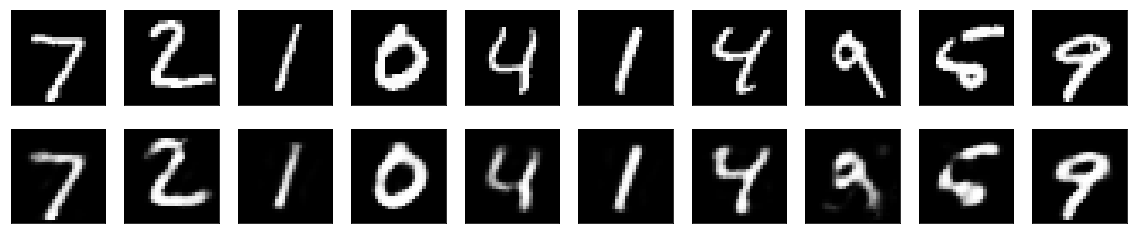

In [46]:


autoencoder=load_model('AEBasico/basic_autoencoder_768x32.h5')

decoder=load_model('AEBasico/decoder_768x32.h5')
encoder=load_model('AEBasico/encoder_768x32.h5')

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
	ax = plt.subplot(2, n, i + 1)
	plt.imshow(x_test[i].reshape(28, 28))
	plt.gray()
	ax.get_xaxis().set_visible(False)
	ax.get_yaxis().set_visible(False)
    
	ax = plt.subplot(2, n, i + 1 + n)
	plt.imshow(decoded_imgs[i].reshape(28, 28))
	plt.gray()
	ax.get_xaxis().set_visible(False)
	ax.get_yaxis().set_visible(False)
plt.show()

La reconstruccion, a pesar de no ser perfecta, mantiene la estructura de la imagen original y es coherente con el error estimado del modelo.

Se estudiara la calidad del enconder a partir del clasificador KNeighbors, que determina la clase de un elemento a partir de K vecinos mas cercanos. Se comparan los resultados obtenidos con los datos de entrenamiento orginales y los reducidos dimensionalmente, tambien se medira el tiempo de computo en ambos casos.

In [47]:
encoder=load_model('AEBasico/encoder_768x32.h5')
encoded_test = encoder.predict(x_test)

clf = KNeighborsClassifier(10)

time_start = time.time()
clf.fit(encoded_test, Y_test)
time_elapsed = (time.time() - time_start)
print 'Encoded Classification Accuracy: %.2f, Computation Time: %.2f s' % (clf.score(encoded_test,Y_test),time_elapsed)

time_start = time.time()
clf.fit(x_test, Y_test)
time_elapsed = (time.time() - time_start)
print 'Original Classification Accuracy: %.2f, Computation Time: %.2f s' % (clf.score(x_test,Y_test),time_elapsed)


Encoded Classification Accuracy: 0.94, Computation Time: 0.01 s
Original Classification Accuracy: 0.94, Computation Time: 0.27 s


El clasificador obtiene negligiblemente mejores resultados con los datos reducidos que con los originales, por lo tanto la reduccion de dimension es suficiente en ese sentido. Sin embargo, el tiempo de computo es substancialemente mejor, en casos con mas datos se deberia notar una diferencia aun mayor.

Se comparara el Encoder con PCA (Principal Component Analysis), tecnica de reduccion que determina los componente principales a partir de los valors propios mas grandes.

In [11]:
for d in[2,8,32,64]:
    encoder=load_model('AEBasico/encoder_768x'+str(d)+'.h5')
    encoded_test = encoder.predict(x_test)
    
    pca = PCA(n_components=d)
    pca.fit(x_train)
    pca_test = pca.transform(x_test)
    
    
    clf = KNeighborsClassifier(10)
    
    time_start = time.time()
    clf.fit(pca_test, Y_test)
    time_elapsed = (time.time() - time_start)
    print 'd=%d'%d
    print 'PCA SCORE: %.2f, Computation Time: %.2f' % (clf.score(pca_test,Y_test),time_elapsed)
    
    time_start = time.time()
    clf.fit(encoded_test, Y_test)
    time_elapsed = (time.time() - time_start)
    print 'AE SCORE: %.2f, Computation Time: %.2f' % (clf.score(encoded_test,Y_test),time_elapsed)


/usr/local/lib/python2.7/dist-packages/keras/models.py:248: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


d=2
PCA SCORE: 0.30, Computation Time: 0.01
AE SCORE: 0.28, Computation Time: 0.01
d=8
PCA SCORE: 0.87, Computation Time: 0.01
AE SCORE: 0.87, Computation Time: 0.01
d=32
PCA SCORE: 0.95, Computation Time: 0.02
AE SCORE: 0.94, Computation Time: 0.01
d=64
PCA SCORE: 0.95, Computation Time: 0.03
AE SCORE: 0.93, Computation Time: 0.02


La diferencia entre ambos metodos es minima, tanto en lo que es tiempo como resultados. Sin embargo, esto da para pensar para que ocupar el AE si esto implica el tiempo de entrenamiento, a diferencia de PCA.

Se vera acontinuacion que se pueden obtener mejores resultados si se ocupan multiples capas ocultas para el auto encoder.

Primero se utilizara una estructura de 4 capas, 768x1000x500x250xd donde d es la dimension reducida. 

In [33]:
loss=[]
for d in[2,4,8,16,32,64]: 
    input_img = Input(shape=(784,))
    encoded1 = Dense(1000, activation='relu')(input_img)
    encoded2 = Dense(500, activation='relu')(encoded1)
    encoded3 = Dense(250, activation='relu')(encoded2)
    encoded4 = Dense(d, activation='relu')(encoded3)
    decoded4 = Dense(250, activation='relu')(encoded4)
    decoded3 = Dense(500, activation='relu')(decoded4)
    decoded2 = Dense(1000, activation='relu')(decoded3)
    decoded1 = Dense(784, activation='sigmoid')(decoded2)
    autoencoder = Model(input=input_img, output=decoded1)
    encoder = Model(input=input_img, output=encoded4)
    encoded_input = Input(shape=(d,))
    decoder_layer = autoencoder.layers[5]
    decoder= Model(input=encoded_input, output=decoder_layer(encoded_input))
    autoencoder.compile(optimizer=SGD(lr=1.0,momentum=0.9, nesterov=True), loss='binary_crossentropy')
    hist=autoencoder.fit(x_train,x_train,nb_epoch=50,batch_size=25,shuffle=True,
    validation_data=(x_val, x_val))
    autoencoder.save('AEDeep/4/autoencoder_part_768x1000x500x250x'+str(d)+'.h5')
    encoder.save('AEDeep/4/encoder_part_768x1000x500x250x'+str(d)+'.h5')
    decoder.save('AEDeep/4/decoder_part_768x1000x500x250x'+str(d)+'.h5')
    loss.append(hist.history['val_loss'][-1])
print(loss)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  if sys.path[0] == '':
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  del sys.path[0]
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:19: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 55000 samples, validate on 5000 samples
Epoch 1/50
55000/55000 [==============================] - 7s - loss: 0.2150 - val_loss: 0.1938
Epoch 2/50
55000/55000 [==============================] - 7s - loss: 0.1944 - val_loss: 0.1951
Epoch 3/50
55000/55000 [==============================] - 7s - loss: 0.2133 - val_loss: 0.2634
Epoch 4/50
55000/55000 [==============================] - 7s - loss: 0.2636 - val_loss: 0.2636
Epoch 5/50
55000/55000 [==============================] - 7s - loss: 0.2637 - val_loss: 0.2634
Epoch 6/50
55000/55000 [==============================] - 7s - loss: 0.2635 - val_loss: 0.2634
Epoch 7/50
55000/55000 [==============================] - 7s - loss: 0.2633 - val_loss: 0.2634
Epoch 8/50
55000/55000 [==============================] - 7s - loss: 0.2633 - val_loss: 0.2631
Epoch 9/50
55000/55000 [==============================] - 7s - loss: 0.2632 - val_loss: 0.2630
Epoch 10/50
55000/55000 [==============================] - 7s - loss: 0.2632 - val_loss: 0.2632


55000/55000 [==============================] - 6s - loss: 0.0893 - val_loss: 0.0932
Epoch 20/50
55000/55000 [==============================] - 6s - loss: 0.0889 - val_loss: 0.0937
Epoch 21/50
55000/55000 [==============================] - 6s - loss: 0.0887 - val_loss: 0.0936
Epoch 22/50
55000/55000 [==============================] - 7s - loss: 0.0884 - val_loss: 0.0926
Epoch 23/50
55000/55000 [==============================] - 7s - loss: 0.0881 - val_loss: 0.0931
Epoch 24/50
55000/55000 [==============================] - 7s - loss: 0.0878 - val_loss: 0.0932
Epoch 25/50
55000/55000 [==============================] - 7s - loss: 0.0877 - val_loss: 0.0933
Epoch 26/50
55000/55000 [==============================] - 7s - loss: 0.0874 - val_loss: 0.0932
Epoch 27/50
55000/55000 [==============================] - 7s - loss: 0.0873 - val_loss: 0.0931
Epoch 28/50
55000/55000 [==============================] - 6s - loss: 0.0870 - val_loss: 0.0927
Epoch 29/50
55000/55000 [===========================

3 capas, 768x1000x500xd

In [36]:
loss=[]
for d in[2,4,8,16,32,64]: 
    input_img = Input(shape=(784,))
    encoded1 = Dense(1000, activation='relu')(input_img)
    encoded2 = Dense(500, activation='relu')(encoded1)
    encoded3 = Dense(d, activation='relu')(encoded2)
    decoded3 = Dense(500, activation='relu')(encoded3)
    decoded2 = Dense(1000, activation='relu')(decoded3)
    decoded1 = Dense(784, activation='sigmoid')(decoded2)
    autoencoder = Model(input=input_img, output=decoded1)
    encoder = Model(input=input_img, output=encoded3)
    encoded_input = Input(shape=(d,))
    decoder_layer = autoencoder.layers[4]
    decoder= Model(input=encoded_input, output=decoder_layer(encoded_input))
    autoencoder.compile(optimizer=SGD(lr=1.0,momentum=0.9, nesterov=True), loss='binary_crossentropy')
    hist=autoencoder.fit(x_train,x_train,nb_epoch=50,batch_size=25,shuffle=True,
    validation_data=(x_val, x_val))
    autoencoder.save('AEDeep/3/autoencoder_part_768x1000x500x'+str(d)+'.h5')
    encoder.save('AEDeep/3/encoder_part_768x1000x500x'+str(d)+'.h5')
    decoder.save('AEDeep/3/decoder_part_768x1000x500x'+str(d)+'.h5')
    loss.append(hist.history['val_loss'][-1])
print(loss)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:17: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 55000 samples, validate on 5000 samples
Epoch 1/50
55000/55000 [==============================] - 7s - loss: 0.2174 - val_loss: 0.1987
Epoch 2/50
55000/55000 [==============================] - 7s - loss: 0.1963 - val_loss: 0.1911
Epoch 3/50
55000/55000 [==============================] - 7s - loss: 0.1918 - val_loss: 0.1885
Epoch 4/50
55000/55000 [==============================] - 7s - loss: 0.1903 - val_loss: 0.1858
Epoch 5/50
55000/55000 [==============================] - 7s - loss: 0.1895 - val_loss: 0.1864
Epoch 6/50
55000/55000 [==============================] - 7s - loss: 0.1885 - val_loss: 0.1890
Epoch 7/50
55000/55000 [==============================] - 6s - loss: 0.1883 - val_loss: 0.1859
Epoch 8/50
55000/55000 [==============================] - 7s - loss: 0.1876 - val_loss: 0.1877
Epoch 9/50
55000/55000 [==============================] - 6s - loss: 0.1875 - val_loss: 0.1859
Epoch 10/50
55000/55000 [==============================] - 6s - loss: 0.1877 - val_loss: 0.1844


55000/55000 [==============================] - 6s - loss: 0.0821 - val_loss: 0.0857
Epoch 20/50
55000/55000 [==============================] - 7s - loss: 0.0819 - val_loss: 0.0858
Epoch 21/50
55000/55000 [==============================] - 6s - loss: 0.0816 - val_loss: 0.0855
Epoch 22/50
55000/55000 [==============================] - 6s - loss: 0.0814 - val_loss: 0.0852
Epoch 23/50
55000/55000 [==============================] - 7s - loss: 0.0812 - val_loss: 0.0856
Epoch 24/50
55000/55000 [==============================] - 7s - loss: 0.0810 - val_loss: 0.0860
Epoch 25/50
55000/55000 [==============================] - 7s - loss: 0.0808 - val_loss: 0.0856
Epoch 26/50
55000/55000 [==============================] - 6s - loss: 0.0807 - val_loss: 0.0853
Epoch 27/50
55000/55000 [==============================] - 6s - loss: 0.0805 - val_loss: 0.0855
Epoch 28/50
55000/55000 [==============================] - 6s - loss: 0.0803 - val_loss: 0.0855
Epoch 29/50
55000/55000 [===========================

2 capas, 768x1000xd

In [38]:
loss=[]
for d in[2,4,8,16,32,64]: 
    input_img = Input(shape=(784,))
    encoded1 = Dense(1000, activation='relu')(input_img)
    encoded2 = Dense(d, activation='relu')(encoded1)
    decoded2 = Dense(1000, activation='relu')(encoded2)
    decoded1 = Dense(784, activation='sigmoid')(decoded2)
    autoencoder = Model(input=input_img, output=decoded1)
    encoder = Model(input=input_img, output=encoded2)
    encoded_input = Input(shape=(d,))
    decoder_layer = autoencoder.layers[3]
    decoder= Model(input=encoded_input, output=decoder_layer(encoded_input))
    autoencoder.compile(optimizer=SGD(lr=1.0,momentum=0.9, nesterov=True), loss='binary_crossentropy')
    hist=autoencoder.fit(x_train,x_train,nb_epoch=50,batch_size=25,shuffle=True,
    validation_data=(x_val, x_val))
    autoencoder.save('AEDeep/2/autoencoder_part_768x1000x'+str(d)+'.h5')
    encoder.save('AEDeep/2/encoder_part_768x1000x'+str(d)+'.h5')
    decoder.save('AEDeep/2/decoder_part_768x1000x'+str(d)+'.h5')
    loss.append(hist.history['val_loss'][-1])
print(loss)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  if sys.path[0] == '':
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Train on 55000 samples, validate on 5000 samples
Epoch 1/50
55000/55000 [==============================] - 5s - loss: 0.2272 - val_loss: 0.2113
Epoch 2/50
55000/55000 [==============================] - 5s - loss: 0.2077 - val_loss: 0.2026
Epoch 3/50
55000/55000 [==============================] - 5s - loss: 0.2017 - val_loss: 0.1977
Epoch 4/50
55000/55000 [==============================] - 5s - loss: 0.1986 - val_loss: 0.1948
Epoch 5/50
55000/55000 [==============================] - 5s - loss: 0.1962 - val_loss: 0.1956
Epoch 6/50
55000/55000 [==============================] - 5s - loss: 0.1943 - val_loss: 0.1908
Epoch 7/50
55000/55000 [==============================] - 5s - loss: 0.1932 - val_loss: 0.1906
Epoch 8/50
55000/55000 [==============================] - 5s - loss: 0.1918 - val_loss: 0.1889
Epoch 9/50
55000/55000 [==============================] - 5s - loss: 0.1909 - val_loss: 0.1897
Epoch 10/50
55000/55000 [==============================] - 5s - loss: 0.1905 - val_loss: 0.1892


55000/55000 [==============================] - 5s - loss: 0.0858 - val_loss: 0.0879
Epoch 20/50
55000/55000 [==============================] - 5s - loss: 0.0856 - val_loss: 0.0877
Epoch 21/50
55000/55000 [==============================] - 5s - loss: 0.0854 - val_loss: 0.0875
Epoch 22/50
55000/55000 [==============================] - 5s - loss: 0.0853 - val_loss: 0.0876
Epoch 23/50
55000/55000 [==============================] - 5s - loss: 0.0851 - val_loss: 0.0875
Epoch 24/50
55000/55000 [==============================] - 4s - loss: 0.0850 - val_loss: 0.0875
Epoch 25/50
55000/55000 [==============================] - 5s - loss: 0.0848 - val_loss: 0.0874
Epoch 26/50
55000/55000 [==============================] - 5s - loss: 0.0847 - val_loss: 0.0872
Epoch 27/50
55000/55000 [==============================] - 5s - loss: 0.0846 - val_loss: 0.0872
Epoch 28/50
55000/55000 [==============================] - 5s - loss: 0.0845 - val_loss: 0.0870
Epoch 29/50
55000/55000 [===========================

Se resumen los errores de reconstruccion en la siguiente tabla 

| Dimension | 2   | 4 |8|16|32|64|
|------|------|-|------|--|-|-|
| 4 Capas| 0.2631| 0.1389| 0.1089| 0.0933| 0.0839| 0.0809|
|   3 Capas | 0.2632| 0.1381| 0.1059| 0.08565| 0.0762| 0.0709|
|2 Capas| 0.1876| 0.1467| 0.1099| 0.0866| 0.0736| 0.0678|

Como se espera, cuanta mayor es la dimension, menor es el error, ya que hay menos perdida de informacion. Sin embargo, el error entre 4 y 3 capas es aproximadamente la misma, esto en comparacion a la de 2 capas que tiene el menor error solo para el caso de 2 dimensiones.
Se concluye que no es mucho el beneficio de hacer el AE muy profundo.

Se compararan los distintos AE profundos con PCA. En primer lugar para 4 capas 768x1000x500x250xd.

In [22]:
for d in [2,4,8,16,32,64]: 
    encoder=load_model('AEDeep/4/autoencoder_part_768x1000x500x250x'+str(d)+'.h5')
    encoded_test = encoder.predict(x_test)
    
    
    
    
    pca = PCA(n_components=d)
    pca.fit(x_train)
    pca_train = pca.transform(x_train)
    pca_test = pca.transform(x_test)
    clf = KNeighborsClassifier(10)
    clf.fit(pca_train, Y_train)
    
    time_start = time.time()
    clf.fit(pca_test, Y_test)
    time_elapsed = (time.time() - time_start)
    print 'd=%d'%d
    print 'PCA SCORE: %.2f, Computation Time: %.2f' % (clf.score(pca_test,Y_test),time_elapsed)
    
    
    time_start = time.time()
    clf.fit(encoded_test, Y_test)
    time_elapsed = (time.time() - time_start)
    print 'AE SCORE: %.2f, Computation Time: %.2f' % (clf.score(encoded_test,Y_test),time_elapsed)


d=2
PCA SCORE: 0.30, Computation Time: 0.01
AE SCORE: 0.00, Computation Time: 0.28
d=4
PCA SCORE: 0.55, Computation Time: 0.01
AE SCORE: 0.94, Computation Time: 0.17
d=8
PCA SCORE: 0.87, Computation Time: 0.01
AE SCORE: 0.95, Computation Time: 0.17
d=16
PCA SCORE: 0.94, Computation Time: 0.01
AE SCORE: 0.94, Computation Time: 0.17
d=32
PCA SCORE: 0.95, Computation Time: 0.01
AE SCORE: 0.95, Computation Time: 0.17
d=64
PCA SCORE: 0.95, Computation Time: 0.02
AE SCORE: 0.94, Computation Time: 0.17


3 capas 768x1000x500xd

In [21]:
for d in [2,4,8,16,32,64]: 
    encoder=load_model('AEDeep/3/autoencoder_part_768x1000x500x'+str(d)+'.h5')
    encoded_test = encoder.predict(x_test)
    
    
    
    
    pca = PCA(n_components=d)
    pca.fit(x_train)
    pca_train = pca.transform(x_train)
    pca_test = pca.transform(x_test)
    clf = KNeighborsClassifier(10)
    clf.fit(pca_train, Y_train)
    
    time_start = time.time()
    clf.fit(pca_test, Y_test)
    time_elapsed = (time.time() - time_start)
    print 'd=%d'%d
    print 'PCA SCORE: %.2f, Computation Time: %.2f' % (clf.score(pca_test,Y_test),time_elapsed)
    
    
    time_start = time.time()
    clf.fit(encoded_test, Y_test)
    time_elapsed = (time.time() - time_start)
    print 'AE SCORE: %.2f, Computation Time: %.2f' % (clf.score(encoded_test,Y_test),time_elapsed)


d=2
PCA SCORE: 0.30, Computation Time: 0.01
AE SCORE: 0.00, Computation Time: 0.28
d=4
PCA SCORE: 0.55, Computation Time: 0.01
AE SCORE: 0.93, Computation Time: 0.18
d=8
PCA SCORE: 0.87, Computation Time: 0.01
AE SCORE: 0.94, Computation Time: 0.18
d=16
PCA SCORE: 0.94, Computation Time: 0.01
AE SCORE: 0.94, Computation Time: 0.19
d=32
PCA SCORE: 0.95, Computation Time: 0.01
AE SCORE: 0.94, Computation Time: 0.17
d=64
PCA SCORE: 0.95, Computation Time: 0.02
AE SCORE: 0.94, Computation Time: 0.17


2 capas 768x1000xd

In [23]:
for d in [2,4,8,16,32,64]: 
    encoder=load_model('AEDeep/2/autoencoder_part_768x1000x'+str(d)+'.h5')
    encoded_test = encoder.predict(x_test)
    
    
    
    
    pca = PCA(n_components=d)
    pca.fit(x_train)
    pca_train = pca.transform(x_train)
    pca_test = pca.transform(x_test)
    clf = KNeighborsClassifier(10)
    clf.fit(pca_train, Y_train)
    
    time_start = time.time()
    clf.fit(pca_test, Y_test)
    time_elapsed = (time.time() - time_start)
    print 'd=%d'%d
    print 'PCA SCORE: %.2f, Computation Time: %.2f' % (clf.score(pca_test,Y_test),time_elapsed)
    
    
    time_start = time.time()
    clf.fit(encoded_test, Y_test)
    time_elapsed = (time.time() - time_start)
    print 'AE SCORE: %.2f, Computation Time: %.2f' % (clf.score(encoded_test,Y_test),time_elapsed)


d=2
PCA SCORE: 0.30, Computation Time: 0.01
AE SCORE: 0.67, Computation Time: 0.20
d=4
PCA SCORE: 0.55, Computation Time: 0.01
AE SCORE: 0.88, Computation Time: 0.17
d=8
PCA SCORE: 0.87, Computation Time: 0.01
AE SCORE: 0.93, Computation Time: 0.17
d=16
PCA SCORE: 0.94, Computation Time: 0.01
AE SCORE: 0.94, Computation Time: 0.17
d=32
PCA SCORE: 0.95, Computation Time: 0.01
AE SCORE: 0.94, Computation Time: 0.19
d=64
PCA SCORE: 0.95, Computation Time: 0.02
AE SCORE: 0.94, Computation Time: 0.17


A diferencia del caso de un AE simple, para dimensiones bajas se encuentran mejores resultados que ocupando PCA, sin embargo, el tiempo de calculo es mucho mayor, y la ventaja se acaba para dimensiones mayores.
Un detalle extraño es que los AE de 3 y 4 capas tuvieron un puntaje de 0 en el caso de 2 dimensiones, suponiendo que no es un error de implementacion, significa que estos serian pesimos aproximadores.
Comparando las capas, como es de esperar se tienen mejores resultados cuanta mas capas hay, pero de todos modos llegan al tope de puntaje de 0.95, que es el mismo que PCA.

Se compararan graficamente PCA con un AE basica 768x32, cuyos outputs seran visualizados con TSNE, una herramienta de sklearn para reducir la dimension a 2.

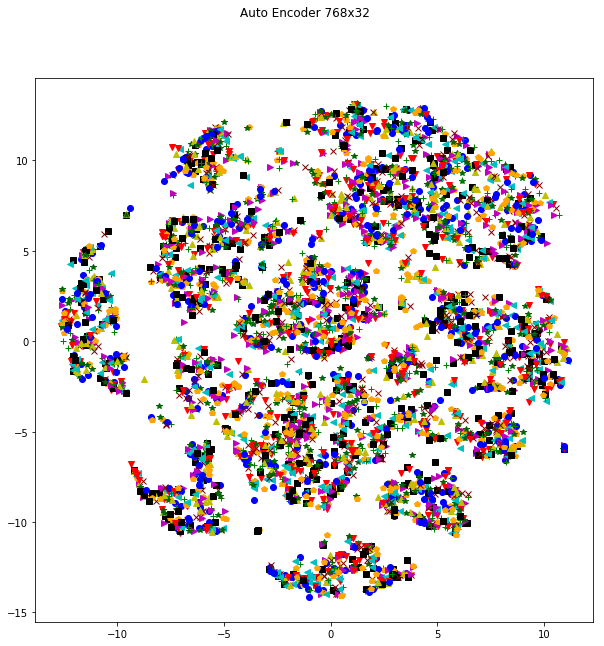

In [58]:
nplot=5000
encoder=load_model('AEBasico/encoder_768x32.h5')
encoded_train = encoder.predict(x_train[:nplot])
model = TSNE(n_components=2, random_state=0)
encoded_train = model.fit_transform(encoded_train)
colors={0:'b',1:'g',2:'r',3:'c',4:'m',5:'y',6:'k',7:'orange',8:'darkgreen',9:'maroon'}
markers={0:'o',1:'+',2: 'v',3:'<',4:'>',5:'^',6:'s',7:'p',8:'*',9:'x'}
plt.figure(figsize=(10, 10))
for idx in xrange(0,nplot):

    label = y_train[idx]
    line = plt.plot(encoded_train[idx][0], encoded_train[idx][1],
    color=colors[label], marker=markers[label], markersize=6)
plt.suptitle('Auto Encoder 768x32')
plt.show()

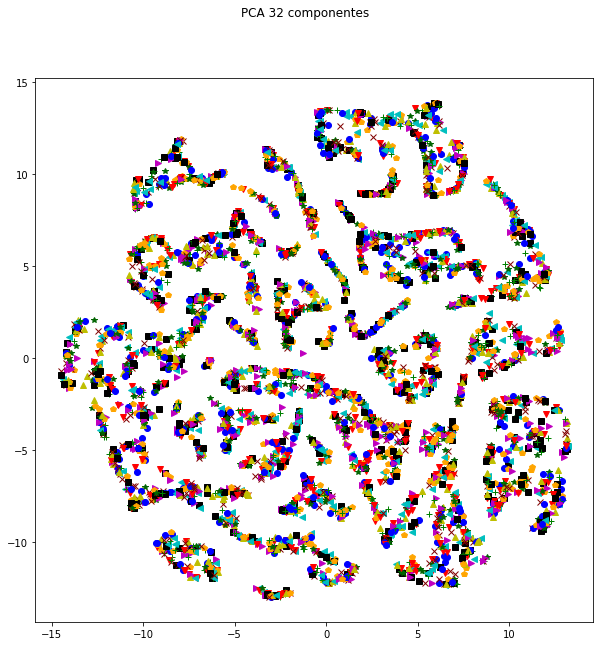

In [59]:
nplot=5000
pca=PCA(n_components=32)

pca.fit(x_train)
encoded_train = pca.transform(x_train)
encoded_train = pca_train[:nplot]

model = TSNE(n_components=2, random_state=0)
encoded_train = model.fit_transform(encoded_train)
colors={0:'b',1:'g',2:'r',3:'c',4:'m',5:'y',6:'k',7:'orange',8:'darkgreen',9:'maroon'}
markers={0:'o',1:'+',2: 'v',3:'<',4:'>',5:'^',6:'s',7:'p',8:'*',9:'x'}
plt.figure(figsize=(10, 10))
for idx in xrange(0,nplot):
    label = y_train[idx]
    line = plt.plot(encoded_train[idx][0], encoded_train[idx][1],
    color=colors[label], marker=markers[label], markersize=6)
plt.suptitle('PCA 32 componentes')
plt.show()

No se aprecia una estructura comun en ambos casos, tan solo unos ¨caminos¨ que aparecen, que podrian interpretarse como clusters, tampoco se ve una relaccion entre objetos de la misma categoria.

Por ultimo, se utilizara un auto encoder convolucional para reducir la dimension a 7x7x8, o sea, 392 dimensiones.

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), padding="same", activation="relu")`
  del sys.path[0]
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D((2, 2), padding="same")`
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), padding="same", activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), padding="same", activation="relu")`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), padding="same", activation="relu")`
/usr/local/lib/python2.7/dist-packages/ipykernel_la

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_31 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_131 (Conv2D)          (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_132 (Conv2D)          (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d_51 (UpSampling (None, 14, 14, 8)         0         
__________

55000/55000 [==============================] - 2s - loss: 0.0716 - val_loss: 0.0717
Epoch 69/100
55000/55000 [==============================] - 2s - loss: 0.0716 - val_loss: 0.0717
Epoch 70/100
55000/55000 [==============================] - 2s - loss: 0.0716 - val_loss: 0.0714
Epoch 71/100
55000/55000 [==============================] - 2s - loss: 0.0715 - val_loss: 0.0718
Epoch 72/100
55000/55000 [==============================] - 2s - loss: 0.0714 - val_loss: 0.0711
Epoch 73/100
55000/55000 [==============================] - 2s - loss: 0.0713 - val_loss: 0.0713
Epoch 74/100
55000/55000 [==============================] - 2s - loss: 0.0714 - val_loss: 0.0707
Epoch 75/100
55000/55000 [==============================] - 2s - loss: 0.0712 - val_loss: 0.0709
Epoch 76/100
55000/55000 [==============================] - 2s - loss: 0.0713 - val_loss: 0.0714
Epoch 77/100
55000/55000 [==============================] - 2s - loss: 0.0714 - val_loss: 0.0714
Epoch 78/100
55000/55000 [=================

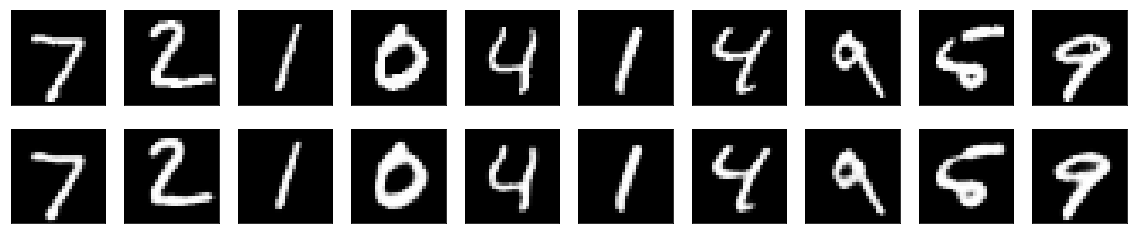

In [43]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
x_val=x_train[:NVAL]
x_train=x_train[NVAL:]
input_img = Input(shape=(28, 28, 1))


x = Conv2D(16, 3, 3, activation='relu', border_mode='same')(input_img)
x = MaxPooling2D((2, 2), border_mode='same')(x)
x = Conv2D(8, 3, 3, activation='relu', border_mode='same')(x)
encoded = MaxPooling2D((2, 2))(x)



x = Conv2D(8, 3, 3, activation='relu', border_mode='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, 3, 3, activation='relu', border_mode='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, 3, 3, activation='sigmoid', border_mode='same')(x)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()


autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_val, x_val))

autoencoder.save('AEConv/autoencoderconv.h5')
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


Se entrenara un AE simple que reduzca a 128 dimensiones y se comparara.

In [48]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input=input_img, output=decoded)
encoder = Model(input=input_img, output=encoded)
encoded_input = Input(shape=(128,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.fit(x_train,x_train,nb_epoch=100,batch_size=25,shuffle=True,
validation_data=(x_val, x_val))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # This is added back by InteractiveShellApp.init_path()


Train on 55000 samples, validate on 5000 samples
Epoch 1/100
55000/55000 [==============================] - 3s - loss: 0.2117 - val_loss: 0.1540
Epoch 2/100
55000/55000 [==============================] - 3s - loss: 0.1369 - val_loss: 0.1213
Epoch 3/100
55000/55000 [==============================] - 3s - loss: 0.1127 - val_loss: 0.1042
Epoch 4/100
55000/55000 [==============================] - 3s - loss: 0.0994 - val_loss: 0.0948
Epoch 5/100
55000/55000 [==============================] - 3s - loss: 0.0920 - val_loss: 0.0893
Epoch 6/100
55000/55000 [==============================] - 3s - loss: 0.0875 - val_loss: 0.0858
Epoch 7/100
55000/55000 [==============================] - 3s - loss: 0.0845 - val_loss: 0.0834
Epoch 8/100
55000/55000 [==============================] - 3s - loss: 0.0823 - val_loss: 0.0815
Epoch 9/100
55000/55000 [==============================] - 3s - loss: 0.0806 - val_loss: 0.0800
Epoch 10/100
55000/55000 [==============================] - 3s - loss: 0.0792 - val_los

55000/55000 [==============================] - 3s - loss: 0.0670 - val_loss: 0.0674
Epoch 86/100
55000/55000 [==============================] - 3s - loss: 0.0670 - val_loss: 0.0674
Epoch 87/100
55000/55000 [==============================] - 3s - loss: 0.0669 - val_loss: 0.0673
Epoch 88/100
55000/55000 [==============================] - 4s - loss: 0.0669 - val_loss: 0.0673
Epoch 89/100
55000/55000 [==============================] - 3s - loss: 0.0669 - val_loss: 0.0673
Epoch 90/100
55000/55000 [==============================] - 3s - loss: 0.0669 - val_loss: 0.0673
Epoch 91/100
55000/55000 [==============================] - 3s - loss: 0.0669 - val_loss: 0.0672
Epoch 92/100
55000/55000 [==============================] - 3s - loss: 0.0668 - val_loss: 0.0672
Epoch 93/100
55000/55000 [==============================] - 3s - loss: 0.0668 - val_loss: 0.0672
Epoch 94/100
55000/55000 [==============================] - 3s - loss: 0.0668 - val_loss: 0.0672
Epoch 95/100
55000/55000 [=================

In [51]:
input_img = Input(shape=(784,))
encoded = Dense(392, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input=input_img, output=decoded)
encoder = Model(input=input_img, output=encoded)
encoded_input = Input(shape=(392,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.fit(x_train,x_train,nb_epoch=100,batch_size=25,shuffle=True,
validation_data=(x_val, x_val))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # This is added back by InteractiveShellApp.init_path()


Train on 55000 samples, validate on 5000 samples
Epoch 1/100
55000/55000 [==============================] - 4s - loss: 0.1896 - val_loss: 0.1361
Epoch 2/100
55000/55000 [==============================] - 4s - loss: 0.1208 - val_loss: 0.1073
Epoch 3/100
55000/55000 [==============================] - 4s - loss: 0.0998 - val_loss: 0.0931
Epoch 4/100
55000/55000 [==============================] - 4s - loss: 0.0894 - val_loss: 0.0861
Epoch 5/100
55000/55000 [==============================] - 4s - loss: 0.0839 - val_loss: 0.0820
Epoch 6/100
55000/55000 [==============================] - 4s - loss: 0.0805 - val_loss: 0.0794
Epoch 7/100
55000/55000 [==============================] - 4s - loss: 0.0783 - val_loss: 0.0775
Epoch 8/100
55000/55000 [==============================] - 4s - loss: 0.0766 - val_loss: 0.0760
Epoch 9/100
55000/55000 [==============================] - 4s - loss: 0.0753 - val_loss: 0.0749
Epoch 10/100
55000/55000 [==============================] - 4s - loss: 0.0742 - val_los

55000/55000 [==============================] - 4s - loss: 0.0650 - val_loss: 0.0653
Epoch 86/100
55000/55000 [==============================] - 4s - loss: 0.0649 - val_loss: 0.0653
Epoch 87/100
55000/55000 [==============================] - 4s - loss: 0.0649 - val_loss: 0.0653
Epoch 88/100
55000/55000 [==============================] - 4s - loss: 0.0649 - val_loss: 0.0653
Epoch 89/100
55000/55000 [==============================] - 4s - loss: 0.0649 - val_loss: 0.0653
Epoch 90/100
55000/55000 [==============================] - 4s - loss: 0.0649 - val_loss: 0.0653
Epoch 91/100
55000/55000 [==============================] - 4s - loss: 0.0649 - val_loss: 0.0652
Epoch 92/100
55000/55000 [==============================] - 4s - loss: 0.0648 - val_loss: 0.0652
Epoch 93/100
55000/55000 [==============================] - 4s - loss: 0.0648 - val_loss: 0.0652
Epoch 94/100
55000/55000 [==============================] - 4s - loss: 0.0648 - val_loss: 0.0652
Epoch 95/100
55000/55000 [=================

Error AE basico        = 0.0667
Error AE convolucional = 0.0712


Los resultados obtenidos no son los esperados, la red convolucional es levemente peor al momento de reducir el error de reconstruccion, sin embargo, graficamente se pueden reconocer las reconstrucciones.

